In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
import re
from sklearn import preprocessing
import warnings
import statsmodels.api as sm 
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Ridge
from sklearn.model_selection import RepeatedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import r2_score
import scipy as sp
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
from xgboost import XGBRegressor
from sklearn.ensemble import RandomForestClassifier
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pickle
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error


pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
warnings.filterwarnings("ignore", category=UserWarning) 

In [2]:
####
df = pd.read_csv('car_data_sorted_Full.csv')
####

In [49]:
print(df_testing[df_testing.Condition == 'New'].Odometer.mean(),\
      df_testing[df_testing.Condition == 'New'].Odometer.count())#[['pID', 'Odometer']].sort_values('Odometer')

29149.15 80


In [4]:
from platform import python_version

print(python_version())

3.10.12


In [5]:
pip install scikit-learn


[notice] A new release of pip is available: 23.0.1 -> 23.1.2
[notice] To update, run: python3.10 -m pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [220]:
file = 'car_data_sorted-Denver.csv'
#file = 'car_data_sorted-Houston.csv'
df_testing2 = pd.read_csv(file)
df_testing2[df_testing2.Make == 'Alfa']
#df_testing.Drive.value_counts()

,Year,Make,Model,Condition,Color,Odometer,Fuel,Cylinders,Title Status,Drive,Transmission,Price
1687,2018,Alfa,Romeo,Like New,Black,89000,Gas,4.0,Lien,4Wd,Automatic,25999
1950,1986,Alfa,Romeo,Good,Black,110000,Gas,4.0,Clean,Rwd,Manual,7600


In [223]:
dfs = []
files = ['car_data_sorted_LA.csv','car_data_sorted_Chicago.csv','car_data_sorted_Dallas.csv', 'car_data_sorted_Phoenix.csv',\
        'car_data_sorted_Seattle.csv','car_data_sorted_SF.csv', 'car_data_sorted_NY.csv','car_data_sorted_Miami.csv',\
        'car_data_sorted_SanDiego.csv','car_data_sorted_Minneapolis.csv','car_data_sorted_Portland.csv','car_data_sorted_Tampa.csv',\
        'car_data_sorted_Detroit.csv','car_data_sorted-Sacramento.csv', 'car_data_sorted-Atlanta.csv','car_data_sorted-Houston.csv',\
        'car_data_sorted-Denver.csv', 'car_data_sorted-NH-Teslas.csv']
for file in files:   
    df = pd.read_csv(file)
    df = df.replace('',np.nan,regex = True)
    dfs.append(df)
    print("Length of 'raw' dataframe: ", len(df))    
df = pd.concat(dfs, axis = 0,sort=True).reset_index(drop = True)
df.to_csv('car_data_sorted_Full_unrefined.csv', index = False)
print('First length of unrefined df: ', len(df))

Length of 'raw' dataframe:  6070
Length of 'raw' dataframe:  2363
Length of 'raw' dataframe:  2557
Length of 'raw' dataframe:  4689
Length of 'raw' dataframe:  3741
Length of 'raw' dataframe:  7049
Length of 'raw' dataframe:  2721
Length of 'raw' dataframe:  2494
Length of 'raw' dataframe:  3145
Length of 'raw' dataframe:  1777
Length of 'raw' dataframe:  3529
Length of 'raw' dataframe:  1319
Length of 'raw' dataframe:  1225
Length of 'raw' dataframe:  3065
Length of 'raw' dataframe:  2083
Length of 'raw' dataframe:  2239
Length of 'raw' dataframe:  2720
Length of 'raw' dataframe:  16
First length of unrefined df:  52802


In [218]:
df[df.Cylinders == 0]

,Color,Condition,Cylinders,Drive,Fuel,Make,Model,Odometer,Price,Title,Transmission_Automatic,Year
38,Grey,Excellent,0,Rwd,Electric,Tesla,Model 3,74000,45000,Clean,1,2018
76,White,Like New,0,4Wd,Electric,Bmw,X5,34700,47500,Clean,1,2018
167,White,Excellent,0,Fwd,Electric,Ford,Mustang,11500,57900,Clean,1,2022
221,White,Excellent,0,4Wd,Electric,Tesla,Model S,64500,26000,Clean,1,2013
491,Grey,Like New,0,Rwd,Electric,Tesla,Model 3,20295,46895,Clean,1,2020
494,Silver,Good,0,Rwd,Electric,Smart,Fortwo,41163,5300,Clean,0,2013
503,Grey,Excellent,0,Rwd,Electric,Tesla,Model S,63000,38900,Clean,1,2016
561,Grey,Excellent,0,Fwd,Electric,Bmw,I3,31053,16900,Clean,1,2015
602,Blue,Excellent,0,Rwd,Electric,Tesla,Model S,82000,27300,Clean,1,2013
612,White,Excellent,0,Rwd,Electric,Tesla,Model 3,27800,35900,Clean,1,2021


In [17]:
# Drop and Impute NaNs
unfilled_cars = []
cnt = 0
cnt1 = 0
cnt2 = 0

df = pd.read_csv('car_data_sorted_Full_unrefined.csv')
df = df.loc[(df['Year'] != 0) & (df['Make'] != 0) & (df['Model'] != 0) & (df['Model'] != '0')].reset_index()

# Model adjustments
for i in range(len(df)):
    if (len(df.loc[i,'Model']) == 4 and df.loc[i,'Model'].isdigit())\
    or (df.loc[i,'Model'] == 'Pickup'): # or len(df.loc[i,'Model']) == 1
        df.loc[i,'Model'] = ''
    if (df.loc[i,'Make'] == 'Honda' and df.loc[i,'Model'] == 'Cr'):
        df.loc[i,'Model'] = 'Crv'
    if df.loc[i,'Make'] == 'Alpha':
        df.loc[i,'Make'] = ''
    if df.loc[i,'Make'] == 'Mustang':
        df.loc[i,'Make'] = 'Ford'
        df.loc[i,'Model'] = 'Mustang'
    if (df.loc[i,'Make'] == 'Tesla' and df.loc[i,'Model'] == 'X'):
        df.loc[i,'Model'] = 'Model X'
    if (df.loc[i,'Make'] == 'Tesla' and df.loc[i,'Model'] == 'S'):
        df.loc[i,'Model'] = 'Model S'
    if (df.loc[i,'Make'] == 'Tesla' and df.loc[i,'Model'] == 'Y'):
        df.loc[i,'Model'] = 'Model Y'
    if (df.loc[i,'Make'] == 'Tesla' and df.loc[i,'Model'] == 'M3'):
        df.loc[i,'Model'] = 'Model 3'
    if (df.loc[i,'Make'] == 'Tesla' and df.loc[i,'Model'] == '3'):
        df.loc[i,'Model'] = 'Model 3'


df = df.drop(columns = ['index'])
df1 = df.loc[:,['Make','Model','Cylinders','Drive']]
df_models2 = pd.read_csv('vehicle_models_updated.csv')
df_models21 = df_models2.loc[:,['Make','Model','Cylinders','Drive']]
df_merged = df1.merge(df_models21, how = 'left', on = ['Make','Model'])
df_first1 = df_merged.loc[:,('Make','Model','Cylinders_x', 'Drive_x')].rename(columns={"Cylinders_x": "Cylinders", "Drive_x": "Drive"})
df_models1 = df_merged.loc[:,('Make','Model','Cylinders_y', 'Drive_y')].rename(columns={"Cylinders_y": "Cylinders", "Drive_y": "Drive"})
df_first1 = df_first1[['Cylinders', 'Drive', 'Make', 'Model']]
df_first1 = df_first1.combine_first(df_models1)

df.loc[:,['Cylinders','Drive','Make','Model']] = df_first1

for i in range(len(df)):
    if df.loc[i,'Make'] == 'Tesla':
        df.loc[i,'Fuel'] = 'Electric'
        df.loc[i,'Transmission'] = 'Automatic'
    if (df.loc[i,'Make'] == 'Tesla' or df.loc[i,'Fuel'] == 'Electric'):
        df.loc[i,'Cylinders'] = '0'

for i in range(1,len(df)):
    if not isinstance(df.loc[i,'Color'], str):
        cnt +=1
        df_t = df[(df['Make'] == df.loc[i,['Make']][0]) & (df['Model'] == df.loc[i,['Model']][0])]['Color']
        df_t = df_t[~df_t.isna()]
        try:
            if len(df_t) >= 9:
                cnt1 +=1
                df.loc[i,'Color'] = df_t.mode()[:1][0]
            else:
                raise Exception('Too short')
        except Exception as e: 
                cnt2 +=1
                unfilled_cars.append(str(df.loc[i,['Make']][0])+' '+str(df.loc[i,['Model']][0]))
                pass      

#df.to_csv('car_data_sorted_Full_refined.csv', index = False)
print('Third length of refined df: ', len(df))

Third length of refined df:  49551


In [25]:
df.Condition.value_counts()

Excellent    14211
Good         11577
Like New      4135
Fair          1871
Salvage        257
New            242
Name: Condition, dtype: int64

In [222]:
df[df.Make == 'Alfa'].Model.value_counts()

Romeo    31
Name: Model, dtype: int64

In [19]:
df = pd.read_csv('car_data_sorted_Full_refined.csv')

# Price, Odometer, and Year Filters     
print(df.isnull().sum())
df = df.dropna(axis=0)
df.reset_index(drop = True, inplace = True)

# create lower price filter
q_low1 = 900
q_low2 = 1983
# create upper price filter
###########################
q_hi1  = df.Price.quantile(0.97)
#print("High price cutoff: ", q_hi1)
q_hi2  = 350000
q_hi3  = 2024
# filter the data frome
df = df[(df["Price"] < q_hi1) & (df["Price"] > q_low1) & (df["Odometer"] < q_hi2) & (df["Year"] > q_low2) & (df["Year"] < q_hi3)]
df.reset_index(drop = True, inplace = True)
print('Fourth length of final df: ', len(df))

# Drop NaN        
df = df.replace('',np.nan,regex = True)
df = df.dropna(axis=0)
df.reset_index(drop = True, inplace = True)
print('Length of df: ', len(df))

#df.to_csv('car_data_sorted_Full_refined_filtered.csv', index = False)

df_f = df

Color           1410
Condition          0
Cylinders       1704
Drive           2408
Fuel               0
Make               1
Model           1081
Odometer           0
Price              0
Title Status       0
Transmission       0
Year               0
dtype: int64
Fourth length of final df:  39437
Length of df:  39437


Length of 'raw' dataframe:  6070
Length of 'raw' dataframe:  2363
Length of 'raw' dataframe:  2557
Length of 'raw' dataframe:  4689
Length of 'raw' dataframe:  3741
Length of 'raw' dataframe:  7049
First length of final df:  26469
Second length of final df:  24880
index              0
Color            923
Condition          0
Cylinders       2382
Drive           3394
Fuel               0
Make               0
Model              0
Odometer           0
Price              0
Title Status       0
Transmission       0
Year               0
dtype: int64
Third length of final df:  24880
Fourth length of final df:  20888
Fifth length of final df:  16835

In [20]:
df = df_f
#df.drop_duplicates(inplace = True)
df_temp = df.groupby(['Make','Model']).size().to_frame().rename(columns = {0: 'count'})
######################################################
df_temp = df_temp[df_temp['count'] >= 24].reset_index()
#df = df.groupby('Make').filter(lambda x : len(x)>19)

df['car'] = ['' for i in range(len(df))]
df.loc[:,('car')] = df["Make"].astype(str) + " " + df["Model"].astype(str)
# df_models2['car'] = df_models2[["Make", "Model"]].apply(" ".join, axis=1)
df_temp['vehicle'] = ['' for i in range(len(df_temp))]
df_temp.loc[:,('vehicle')] = df_temp["Make"].astype(str) + " " + df_temp["Model"].astype(str)
print(len(df))
df = df[df['car'].isin(df_temp['vehicle'])]
print(len(df))
df = df.drop('car', axis = 1)
df = df.reset_index(drop = True)
print(len(df))
#df.drop('index', axis = 1, inplace = True)
print('Final length of final df: ', len(df))

#df = df.dropna(axis=0)
df['Cylinders'] = pd.to_numeric(df['Cylinders']).astype(int)
df['Odometer'] = pd.to_numeric(df['Odometer']).astype(int)
df['Price'] = pd.to_numeric(df['Price']).astype(int)
df['Year'] = pd.to_numeric(df['Year']).astype(int)

df.rename(columns = {'Title Status': 'Title'}, inplace = True)
#Feature Engineering
#df['Condition'].replace({'New': 'Excellent', 'Like New': 'Excellent', 'Fair': 'Good', 'Salvage': "Good"}, inplace = True)
df['Transmission'].replace({'Automatic': 1, 'Manual': 0, 'Other': 0}, inplace = True)
df.rename(columns = {'Transmission': 'Transmission_Automatic'}, inplace = True)
# So that there are only 4 conditions: "New", "Excellent", "Good", and "Salvage"
#df['Condition'].replace({'New': 'Excellent', 'Like New': 'Excellent', 'Fair': 'Good', 'Salvage': "Good"}, inplace = True)
#df['Condition'].replace({'New': 5, 'Like New': 4, 'Excellent': 3, 'Good': 2, 'Fair': 1, 'Salvage': 0}, inplace = True)
# df.rename(columns = {'Condition': 'Condition_Excellent'}, inplace = True)
df = df.dropna(axis=0)

# df.to_csv('car_data_sorted_Full.csv', index = False)
# df.to_csv('/Users/alex/Data_Science/Used_Cars/car_app/car_data_sorted_Full.csv', index = False)


39437
32293
32293
Final length of final df:  32293


In [55]:
color_vals = df.Color.value_counts().index
dropdown_colors = []
for color in color_vals:
    dropdown_colors.append({'label': color, 'value': color})
dropdown_colors

[{'label': 'White', 'value': 'White'},
 {'label': 'Black', 'value': 'Black'},
 {'label': 'Silver', 'value': 'Silver'},
 {'label': 'Grey', 'value': 'Grey'},
 {'label': 'Blue', 'value': 'Blue'},
 {'label': 'Red', 'value': 'Red'},
 {'label': 'Green', 'value': 'Green'},
 {'label': 'Brown', 'value': 'Brown'},
 {'label': 'Custom', 'value': 'Custom'},
 {'label': 'Yellow', 'value': 'Yellow'},
 {'label': 'Orange', 'value': 'Orange'},
 {'label': 'Purple', 'value': 'Purple'}]

High price cutoff:  49995.0
Second length of final df:  16777
Final length of final df:  14470High price cutoff:  49995.0
Second length of final df:  16777
Final length of final df:  14470

In [ ]:
for c,i in enumerate(df[['Make','Model']].values):
    if i[0] not in df_temp[['Make','Model']].values:
        df.loc[c,['Make']] = 0
        #print(c)
        df.loc[c,['Model']] = 0

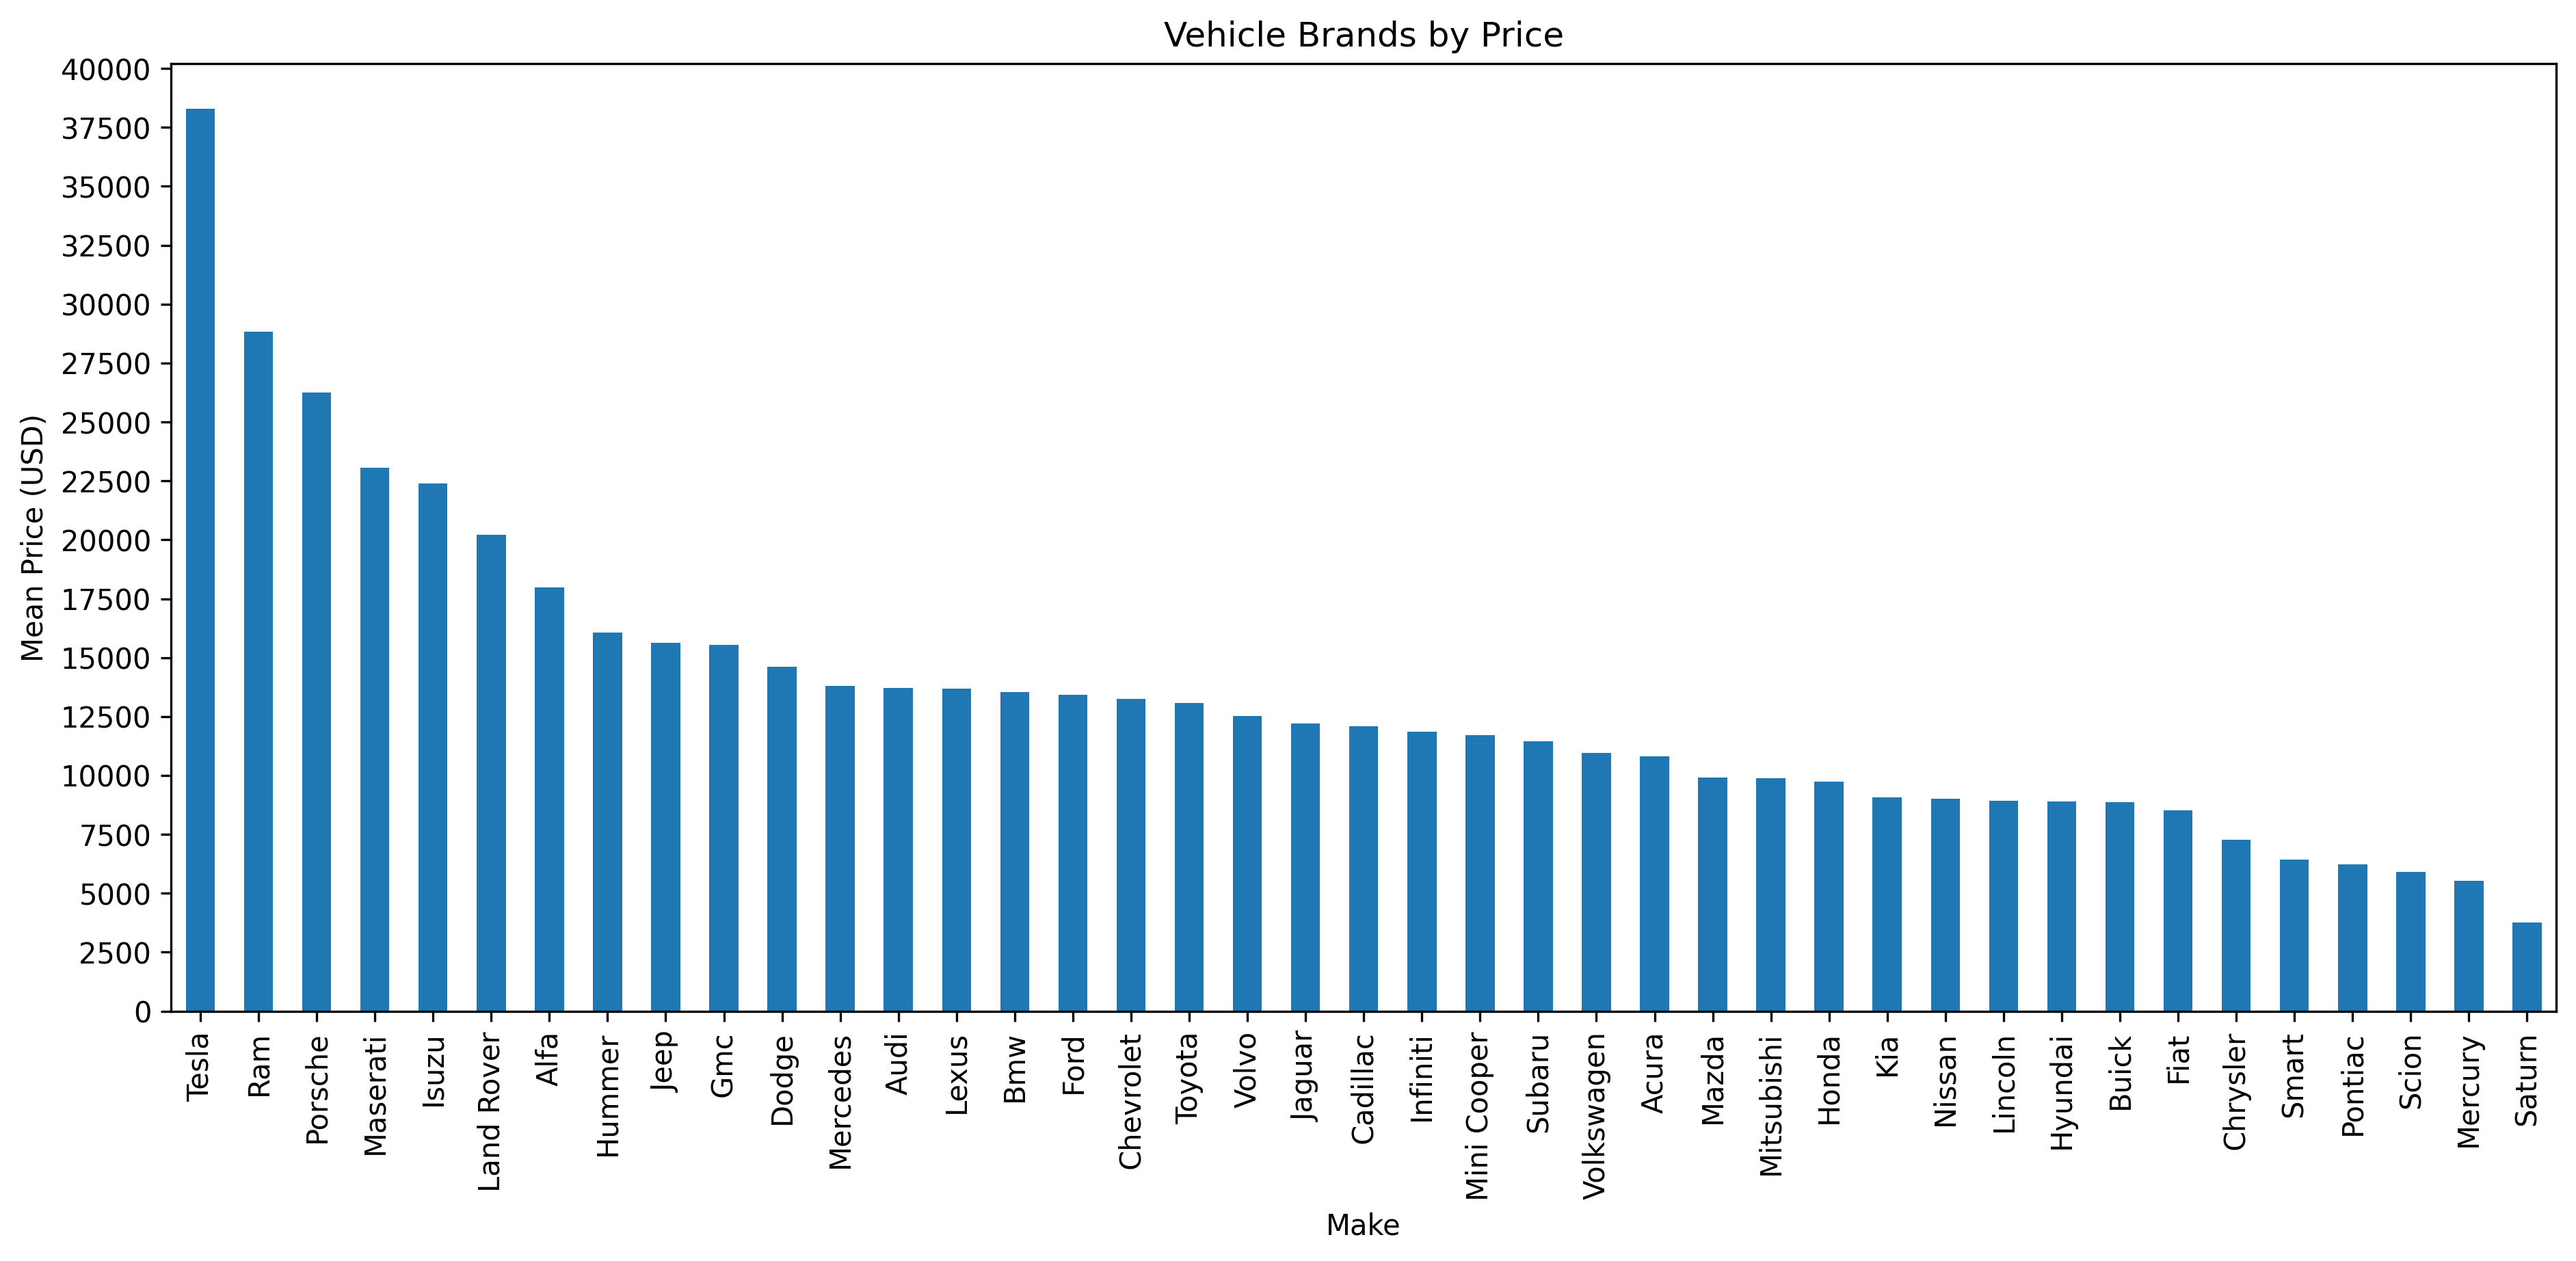

In [21]:
fig = plt.figure(dpi=300)
df.groupby('Make').Price.mean().sort_values(ascending = False).\
plot(kind = 'bar',figsize = (15,6), title = "Vehicle Brands by Price", ylabel = "Mean Price (USD)",ax = plt.gca()\
    ,yticks = np.arange(0,40001,2500));

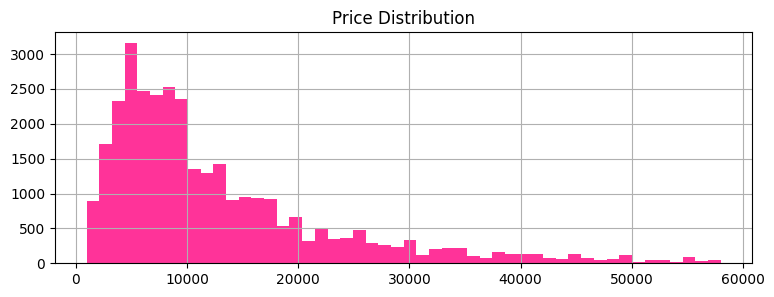

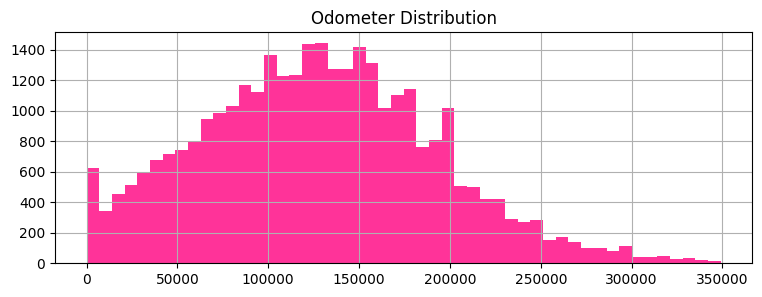

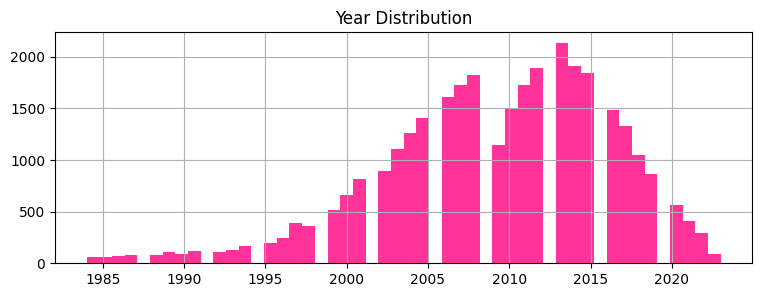

In [5]:
# a different view of the distributions
for i in ["Price", "Odometer","Year"]:
    df[i].hist(bins=50,figsize=(9, 3),color='#FF3399');
    plt.title(i + ' Distribution', loc = 'center');
    plt.show()

In [44]:
df[(df.Make == "Honda") & (df.Model == 'Accord')].Color.value_counts().index

Index(['Grey', 'Black', 'White', 'Silver', 'Blue', 'Red', 'Brown', 'Green',
       'Custom', 'Yellow', 'Purple'],
      dtype='object')

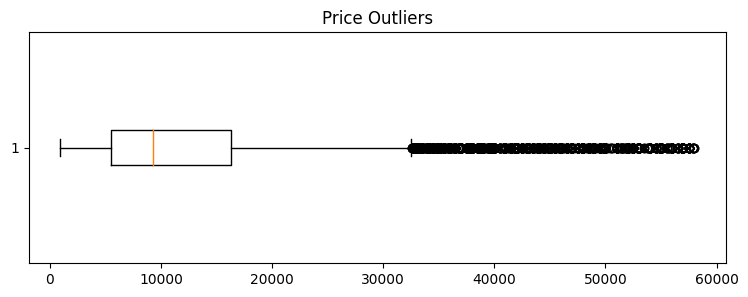

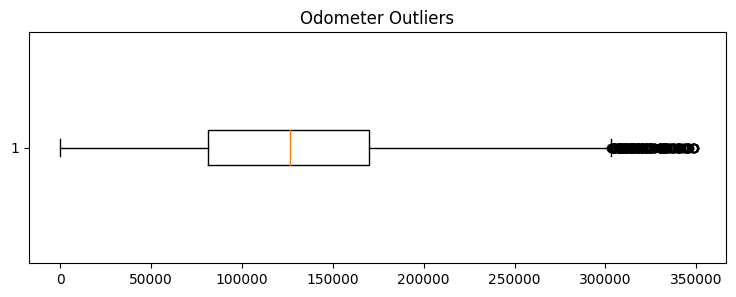

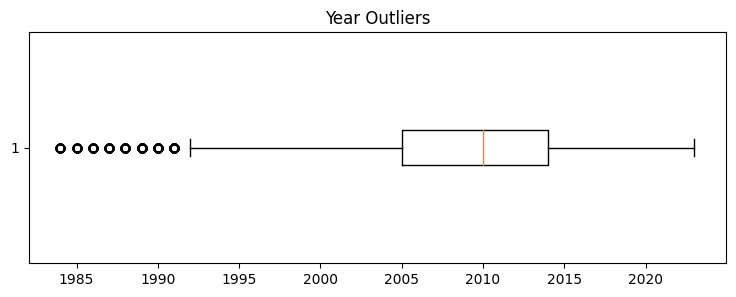

In [6]:
# check price distribution for outliers
for i in ["Price", "Odometer", "Year"]:
    fig, ax = plt.subplots(1,1,figsize=(9,3))
    boxplot = plt.boxplot(df[i], showfliers=True, vert=False)
    plt.title(i+ " Outliers", loc = 'center')

In [2]:
df = pd.read_csv('/Users/alex/Data_Science/Used_Cars_Project/car_data_sorted_Full.csv')

In [22]:
#features_cat = ["Make", "Color", "Drive",'Fuel', 'Title Status']
features_cat_basic = ["Make", "Model", "Drive", 'Fuel', 'Title', 'Color','Cylinders', 'Condition']

df_make = df[['Make']]
#price dataframe
df_price = df[['Price']]
df_num = df[["Year",'Odometer']]
df_num_price = pd.concat([df_num, df_price], axis = 1,sort=True)
#categorical features dataframe
#df_cat = df[features_cat]
df_cat_basic = df[features_cat_basic]
# Get dummies
#df_dum = pd.get_dummies(df_cat)
df_dum_basic = pd.get_dummies(df_cat_basic.astype(str))

#df_other = pd.concat([df_dum,df[['Transmission_Automatic']]], axis = 1,sort=True)#.reset_index(drop = True)],axis = 1,sort=True)

df_basic = pd.concat([df_dum_basic,df_num,df[['Transmission_Automatic']]], axis = 1,sort=True)

#df_basic = pd.concat([df_dum_basic,df_num,df[['Transmission_Automatic', 'Condition_Excellent']]], axis = 1,sort=True)

scaler = MinMaxScaler()
df_basic_scaled = pd.DataFrame(scaler.fit_transform(df_basic), columns = df_basic.columns)
df_basic_unscaled = pd.DataFrame(scaler.inverse_transform(df_basic_scaled), columns = df_basic.columns)

df_basic_price = pd.concat([df_basic, df_price], axis = 1,sort=True)
#df_all = pd.concat([df_other,df_num], axis = 1,sort=True)
#df_all_price = pd.concat([df_all, df_price], axis = 1,sort=True)

#X = df_basic
# X = df_basic_scaled
#y = df_price

df_info = pd.DataFrame(np.zeros([1,df_basic.shape[1]]), columns = df_basic.columns).astype(int)

df_info.to_csv('/Users/alex/Data_Science/Used_Cars/car_app/df_info.csv', index = False)
df_basic.to_csv('/Users/alex/Data_Science/Used_Cars/car_app/df_basic.csv', index = False)


In [61]:
df_info = pd.DataFrame(np.zeros([1,df_basic.shape[1]]), columns = df_basic.columns).astype(int)
df_info.iloc[0,0] = df_basic.shape[0]

We use statsmodels to attain some metrics about our dataset like the R-squared value, F-statistic, and p values for each variable:

In [23]:
X = df_basic
y = df_price
X_sm = sm.add_constant(X) 
est = sm.OLS(y, X_sm).fit() 
est.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Price   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.715
Method:                 Least Squares   F-statistic:                     263.3
Date:                Wed, 19 Jul 2023   Prob (F-statistic):               0.00
Time:                        16:39:25   Log-Likelihood:            -3.2388e+05
No. Observations:               32293   AIC:                         6.484e+05
Df Residuals:                   31983   BIC:                         6.510e+05
Df Model:                         309                                         
Covariance Type:            nonrobust                                         
==========================================================================================
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                  -6.656e+05   6232.244   -106.797      0.000   -6.78e+05   -6.53e+05
Make_Acura             -1.692e+04    328.780    -51.473      0.000   -1.76e+04   -1.63e+04
Make_Alfa              -6928.5404    499.143    -13.881      0.000   -7906.879   -5950.202
Make_Audi              -1.881e+04    310.505    -60.581      0.000   -1.94e+04   -1.82e+04
Make_Bmw               -1.708e+04    312.938    -54.588      0.000   -1.77e+04   -1.65e+04
Make_Buick              -2.03e+04    398.154    -50.990      0.000   -2.11e+04   -1.95e+04
Make_Cadillac          -1.875e+04    315.862    -59.372      0.000   -1.94e+04   -1.81e+04
Make_Chevrolet         -2.042e+04    252.920    -80.728      0.000   -2.09e+04   -1.99e+04
Make_Chrysler           -2.03e+04    408.642    -49.677      0.000   -2.11e+04   -1.95e+04
Make_Dodge             -2.671e+04    782.464    -34.132      0.000   -2.82e+04   -2.52e+04
Make_Fiat              -1.479e+04    349.551    -42.304      0.000   -1.55e+04   -1.41e+04
Make_Ford              -1.213e+04    695.432    -17.447      0.000   -1.35e+04   -1.08e+04
Make_Gmc               -1.707e+04    320.867    -53.213      0.000   -1.77e+04   -1.64e+04
Make_Honda             -1.726e+04    261.437    -66.027      0.000   -1.78e+04   -1.67e+04
Make_Hummer            -9121.6584    452.586    -20.155      0.000      -1e+04   -8234.573
Make_Hyundai           -2.233e+04    309.751    -72.095      0.000   -2.29e+04   -2.17e+04
Make_Infiniti          -1.785e+04    383.470    -46.541      0.000   -1.86e+04   -1.71e+04
Make_Isuzu             -6443.5196    461.666    -13.957      0.000   -7348.402   -5538.637
Make_Jaguar            -1.398e+04    522.260    -26.764      0.000    -1.5e+04    -1.3e+04
Make_Jeep              -2.244e+04    883.233    -25.402      0.000   -2.42e+04   -2.07e+04
Make_Kia               -2.322e+04    309.257    -75.093      0.000   -2.38e+04   -2.26e+04
Make_Land Rover        -1.135e+04    383.982    -29.555      0.000   -1.21e+04   -1.06e+04
Make_Lexus             -1.585e+04    310.907    -50.988      0.000   -1.65e+04   -1.52e+04
Make_Lincoln           -1.557e+04    613.467    -25.380      0.000   -1.68e+04   -1.44e+04
Make_Maserati          -7686.9589    567.833    -13.537      0.000   -8799.933   -6573.985
Make_Mazda              -1.96e+04    640.462    -30.601      0.000   -2.09e+04   -1.83e+04
Make_Mercedes          -1.798e+04    622.367    -28.890      0.000   -1.92e+04   -1.68e+04
Make_Mercury             -2.6e+04   1292.316    -20.117      0.000   -2.85e+04   -2.35e+04
Make_Mini Cooper       -1.238e+04    316.031    -39.173      0.000    -1.3e+04   -1.18e+04
Make_Mitsubishi        -1.633e+04    435.635    -37.488      0.000   -1.72e+04   -1.55e+04
Make_Nissan            -2.288e+04    268.761    -85.139      0.000   -2.34e+04  

In [ ]:
num_rows = 60
num_cols = 6
df_of = df_basic
#.iloc[:,np.arange(289,329).tolist()]

fig, axs = plt.subplots(num_rows,num_cols, figsize=(50, 70),sharey=True);
features = df_of.columns
start = 0
stop = num_rows
y_axis = df_price
for col in range(num_cols):
    if col != 0:
        start = start + num_rows
        stop = start + num_rows
    for x,i in enumerate(features[start:stop]):
        if col == 0:
            x_axis=df_of[i]
            sns.regplot(x= x_axis, y = y_axis, ax=axs[x, col]); axs[x, col].set_xlabel(i, fontsize = 13);
            axs[x, col].set_ylabel('Price', fontsize = 15); r, p = sp.stats.pearsonr(x_axis, y_axis);
            axs[x, col].text(.1, .8, [round(r[0],2), round(p,2)], transform=axs[x, col].transAxes, fontsize=14)
        else:
            x_axis=df_of[i]
            sns.regplot(x=x_axis, y = y_axis, ax=axs[x, col]); axs[x, col].set_xlabel(i, fontsize = 13);
            axs[x, col].set_ylabel('Price', fontsize = 15); r, p = sp.stats.pearsonr(x_axis, y_axis);
            axs[x, col].text(.1, .8, [round(r[0],2), round(p,2)], transform=axs[x, col].transAxes,fontsize=14)
plt.tight_layout()

In [9]:
len(df_basic.columns.tolist())

351

In [183]:
df.Condition.value_counts()

Excellent    10778
Good          7828
Name: Condition, dtype: int64

In [187]:
[variance_inflation_factor(df_basic.iloc[:,np.arange(200,289).tolist()], i)\
 for i in range(len(df_basic.iloc[:,np.arange(200,289).tolist()].columns))]

[1.0,
 0.4046511627906977,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.4482758620689655,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.13804713804713803,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.27272727272727276,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 0.2928176795580111,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0,
 1.0]

In [154]:
df11 = pd.read_csv('car_data_sorted_Miami1.csv')

<AxesSubplot: >

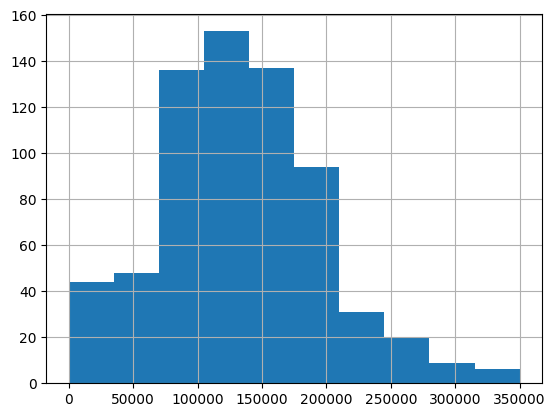

In [167]:
df11[df11.Condition == 'Good'].Odometer.hist(range=[0, 350000])

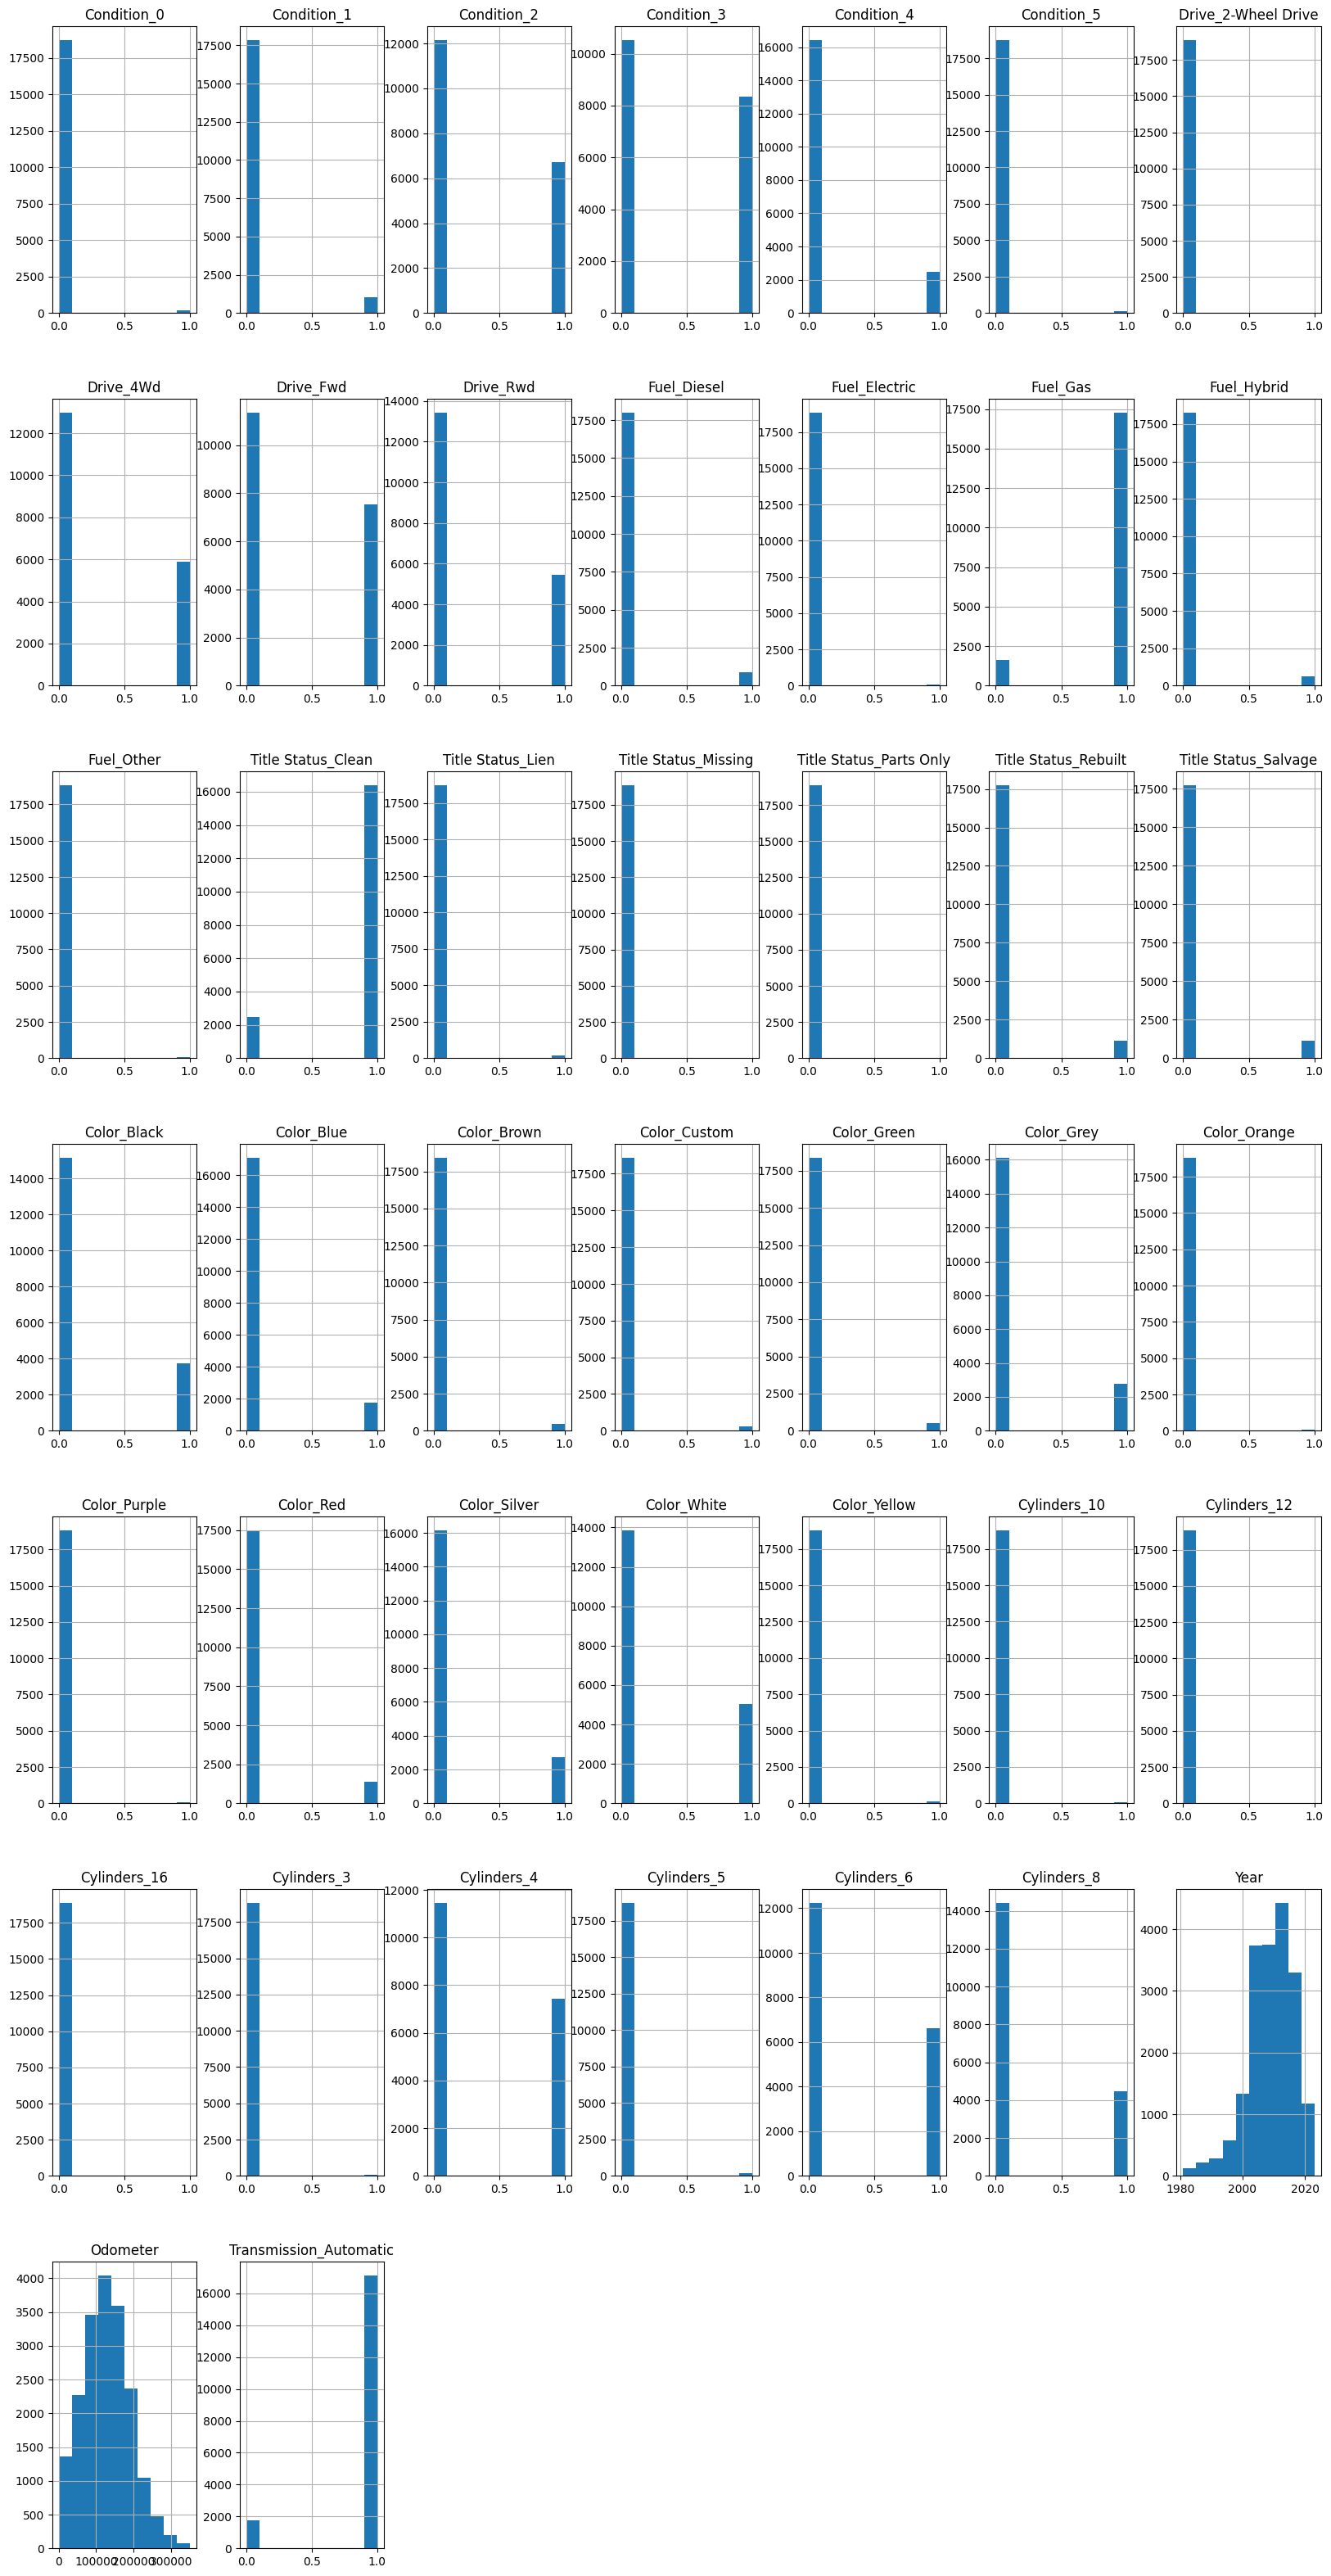

In [115]:
df_basic.iloc[:,np.arange(305,349).tolist()].hist(figsize = (20,40));

## Linear Regression

In [24]:
X = df_basic_scaled
X2 = df_basic
y = np.log(df_price)
y2 = df_price
test_size = 0.3
# Scaled X and y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
# Unscaled X, scaled y
X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y, test_size = test_size, random_state=0)
# Unscaled X and y
X_train3, X_test3, y_train3, y_test3 = train_test_split(X2, y2, test_size = test_size, random_state=0)
# Scaled X, Unscaled y
X_train4, X_test4, y_train4, y_test4 = train_test_split(X, y2, test_size = test_size, random_state=0)

# Linear regression:
lm = LinearRegression()
lm.fit(X_train, y_train); y_hat_linear = lm.predict(X_test); y_hat_linear = np.exp(y_hat_linear)
# Linear regression:
lm = LinearRegression()
lm.fit(X_train2, y_train2); y_hat_linear2 = lm.predict(X_test2); y_hat_linear2 = np.exp(y_hat_linear2)
# Linear regression:
lm = LinearRegression() 
lm.fit(X_train3, y_train3); y_hat_linear3 = lm.predict(X_test3)
# Linear regression:
lm = LinearRegression() 
lm.fit(X_train4, y_train4); y_hat_linear4 = lm.predict(X_test4)
# y_hat_linear = y_hat_linear
# Lasso regression:
lasso = Lasso()
lasso.fit(X_train2,y_train2); y_hat_lasso = lasso.predict(X_test2); y_hat_lasso = np.exp(y_hat_lasso)
# Ridge regression:
ridge = Ridge()
ridge.fit(X_train2,y_train2); y_hat_ridge = ridge.predict(X_test2); y_hat_ridge = np.exp(y_hat_ridge)
# Revert tranformation
y_test= np.exp(y_test); y_test2= np.exp(y_test2)

Even though the R2 value for scaled X, untransformed y is largest, from the graph we can see that there is too much
variance for that case at all prices, whereas for the other case, it's just with high prices.  

R squared: 0.711
MAE: 3821.986
MSE: 30190283.525


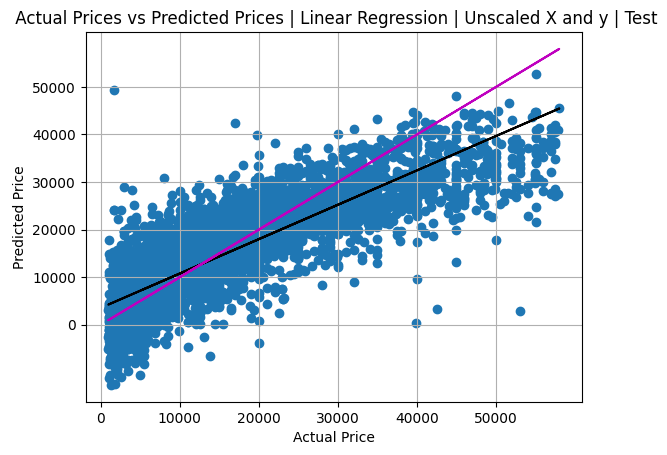

R squared: 0.711
MAE: 3824.678
MSE: 30183108.263


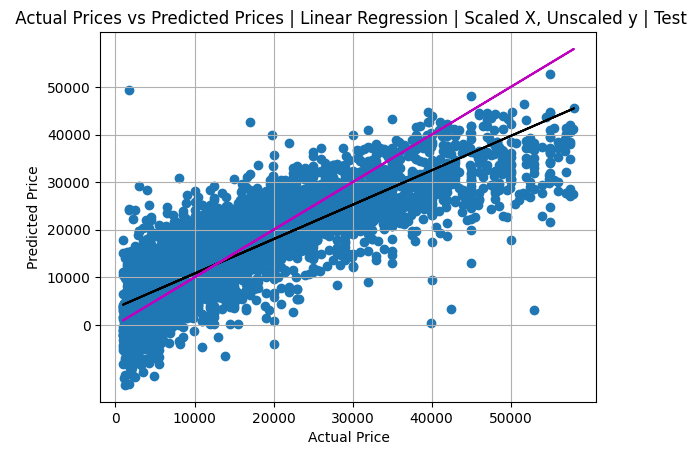

R squared: 0.736
MAE: 3202.721
MSE: 27566105.833


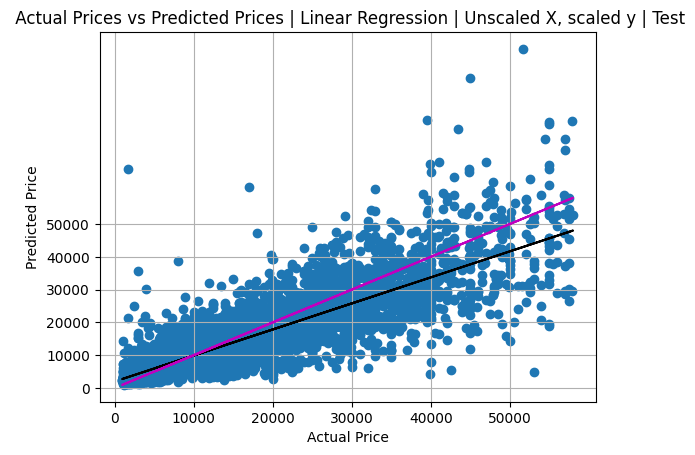

R squared: 0.737
MAE: 3201.319
MSE: 27517243.257


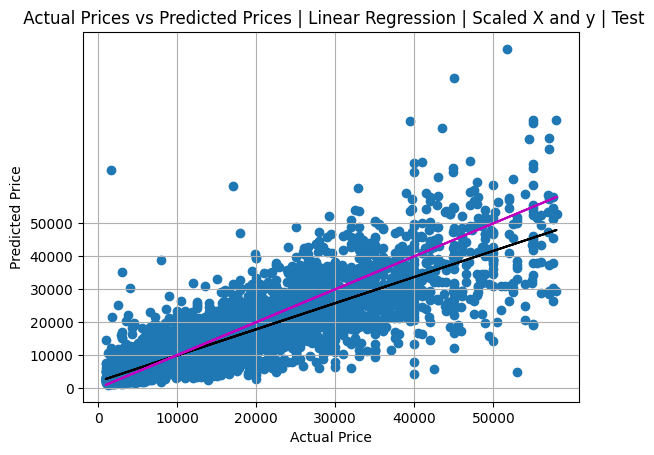

In [32]:
# Scaled X, Unscaled y
for (y_test, y_hat, title) in zip((y_test3,y_test4,y_test2,y_test),\
                                  (y_hat_linear4,y_hat_linear3,y_hat_linear2,y_hat_linear),\
                                  ('Unscaled X and y','Scaled X, Unscaled y', 'Unscaled X, scaled y', 'Scaled X and y')):
    x = y_test ;y = y_hat
    print("R squared:",round(r2_score(x,y),3)); a, b = np.polyfit(x.Price.values, y, 1);
    print('MAE:', round(mean_absolute_error(x, y),3))
    print('MSE:', round(mean_squared_error(x, y),3))
    plt.scatter(x,y); plt.xlabel("Actual Price"); plt.ylabel("Predicted Price"); plt.plot(x, a*x+b, '-k')
    plt.plot(x, x, '-m')
    plt.xticks(np.arange(0,60000,10000)); plt.yticks(np.arange(0,60000,10000))
    plt.title(" Actual Prices vs Predicted Prices | Linear Regression | "+ title + " | Test");plt.grid(); plt.show();

Having seen the above graphs, we come to the conclusion that it would be best to scale only the target variable (Price)

## Regression Tree

R squared: 0.639
MAE: 3789.584
MSE: 37757232.95


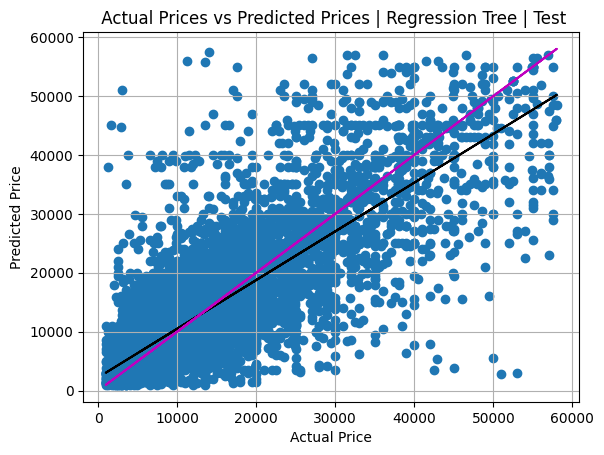

In [33]:
X = df_basic
y = df_price; #y = np.log(df_price)
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
regression_tree = DecisionTreeRegressor(criterion = "squared_error")
regression_tree.fit(X_train, y_train)
score = regression_tree.score(X_test, y_test)
y_hat_tree = regression_tree.predict(X_test)
#y_test = np.exp(y_test); y_hat_tree = np.exp(y_hat_tree)

x = y_test; y = y_hat_tree; a, b = np.polyfit(x.Price.values, y, 1); plt.plot(x, a*x+b, '-k'); plt.plot(x, x, '-m')
print("R squared:",round(r2_score(x,y),3));
print('MAE:', round(mean_absolute_error(x, y),3))
print('MSE:', round(mean_squared_error(x, y),3))
plt.scatter(x,y); plt.xlabel("Actual Price"); plt.ylabel("Predicted Price");
plt.title(" Actual Prices vs Predicted Prices | Regression Tree | Test");plt.grid(); plt.show();

## Random Forest

R squared: 0.648
MAE: 3758.232
MSE: 36762406.605


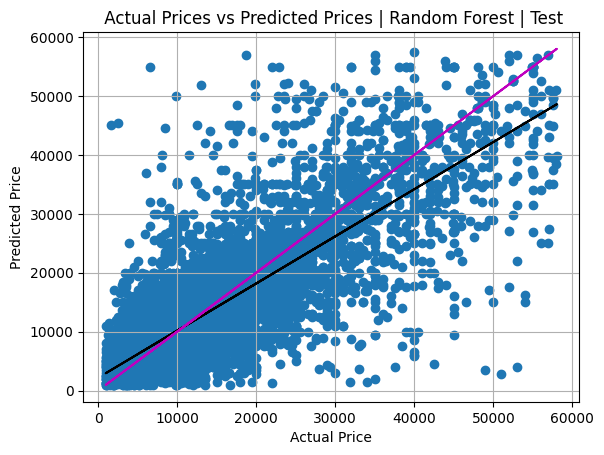

In [34]:
X = df_basic
y = df_price
test_size = 0.3
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
rfc = RandomForestClassifier(bootstrap=True, n_estimators=70,random_state=0)
rfc.fit(X_train, y_train)
score = rfc.score(X_test, y_test)
y_hat_forest = rfc.predict(X_test)

x = y_test; y = y_hat_forest; a, b = np.polyfit(x.Price.values, y, 1); plt.plot(x, a*x+b, '-k'); plt.plot(x, x, '-m')
print("R squared:",round(r2_score(x,y),3));
print('MAE:', round(mean_absolute_error(x, y),3))
print('MSE:', round(mean_squared_error(x, y),3))
plt.scatter(x,y); plt.xlabel("Actual Price"); plt.ylabel("Predicted Price");
plt.title(" Actual Prices vs Predicted Prices | Random Forest | Test");plt.grid(); plt.show();

## XGBoost

In [12]:
df.Condition.value_counts().index

Index(['Excellent', 'Good', 'Like New', 'Fair', 'Salvage', 'New'], dtype='object')

In [15]:
len(df_basic.columns.tolist())

351

R squared: 0.825
MAE: 2757.316
MSE: 18291157.564


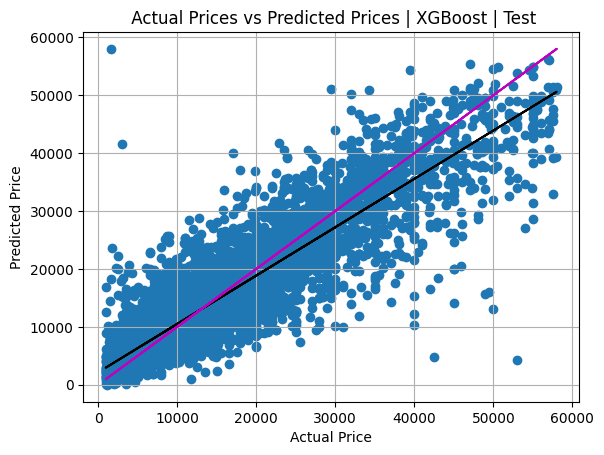

In [35]:
X = df_basic
y = df_price
test_size = 0.30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = test_size, random_state=0)
bst = XGBRegressor(n_estimators=160,objective='reg:squarederror')
bst.fit(X_train, y_train)

#score = bst.score(X_test, y_test)
y_hat_bst = bst.predict(X_test)

x = y_test; y = y_hat_bst; a, b = np.polyfit(x.Price.values, y, 1); plt.plot(x, a*x+b, '-k'); plt.plot(x, x, '-m')
print("R squared:",round(r2_score(x,y),3));
print('MAE:', round(mean_absolute_error(x, y),3))
print('MSE:', round(mean_squared_error(x, y),3))
plt.scatter(x,y); plt.xlabel("Actual Price"); plt.ylabel("Predicted Price");
plt.title(" Actual Prices vs Predicted Prices | XGBoost | Test");plt.grid(); plt.show();

file_path = "/Users/alex/Data_Science/Used_Cars/car_app/xgb_model.pkl"
file_path2 = "xgb_model.pkl"
# save
pickle.dump(bst, open(file_path, "wb"))
pickle.dump(bst, open(file_path2, "wb"))

In [16]:
bst = pickle.load(open('xgb_model.pkl', "rb"))

In [232]:
#bst.save_model("/Users/alex/Data_Science/Used_Cars/car_app2/xgb_model.txt")

In [21]:
frame.head()

,Make_Acura,Make_Alfa,Make_Audi,Make_Bmw,Make_Buick,Make_Cadillac,Make_Chevrolet,Make_Chrysler,Make_Dodge,Make_Fiat,Make_Ford,Make_Gmc,Make_Honda,Make_Hummer,Make_Hyundai,Make_Infiniti,Make_Isuzu,Make_Jaguar,Make_Jeep,Make_Kia,Make_Land Rover,Make_Lexus,Make_Lincoln,Make_Maserati,Make_Mazda,Make_Mercedes,Make_Mercury,Make_Mini Cooper,Make_Mitsubishi,Make_Nissan,Make_Pontiac,Make_Porsche,Make_Ram,Make_Saturn,Make_Scion,Make_Smart,Make_Subaru,Make_Tesla,Make_Toyota,Make_Volkswagen,Make_Volvo,Model_200,Model_3,Model_300,Model_325Ci,Model_325I,Model_328I,Model_328Xi,Model_330Ci,Model_330I,Model_335I,Model_350Z,Model_4Runner,Model_5,Model_500,Model_528I,Model_535I,Model_6,Model_650I,Model_750Li,Model_911,Model_A3,Model_A4,Model_A5,Model_A6,Model_A7,Model_Acadia,Model_Accent,Model_Accord,Model_Altima,Model_Armada,Model_Astro,Model_Ats,Model_Avalanche,Model_Avalon,Model_Avenger,Model_Beetle,Model_Blazer,Model_Boxster,Model_Bronco,Model_C230,Model_C250,Model_C300,Model_Camaro,Model_Camry,Model_Canyon,Model_Caravan,Model_Cayenne,Model_Cc,Model_Challenger,Model_Charger,Model_Cherokee,Model_Civic,Model_Colorado,Model_Compass,Model_Corolla,Model_Corvette,Model_Crosstrek,Model_Crown,Model_Cruze,Model_Crv,Model_Cts,Model_Cx,Model_Dakota,Model_Dart,Model_Deville,Model_Discovery,Model_Dts,Model_Durango,Model_E150,Model_E250,Model_E320,Model_E350,Model_E450,Model_Eclipse,Model_Econoline,Model_Edge,Model_Elantra,Model_Eldorado,Model_Element,Model_Enclave,Model_Encore,Model_Envoy,Model_Equinox,Model_Es,Model_Es350,Model_Escalade,Model_Escape,Model_Eurovan,Model_Excursion,Model_Expedition,Model_Explorer,Model_Express,Model_F150,Model_F250,Model_F350,Model_F450,Model_F550,Model_Fiesta,Model_Firebird,Model_Fit,Model_Fj,Model_Flex,Model_Focus,Model_Forester,Model_Forte,Model_Fortwo,Model_Frontier,Model_Fusion,Model_Fx35,Model_G35,Model_G37,Model_G6,Model_Genesis,Model_Gl450,Model_Golf,Model_Grand,Model_Gs,Model_Gti,Model_Gx,Model_Gx470,Model_H2,Model_H3,Model_Hhr,Model_Highlander,Model_I3,Model_Impala,Model_Impreza,Model_Is,Model_Is250,Model_Jetta,Model_Journey,Model_Juke,Model_Lacrosse,Model_Lancer,Model_Land,Model_Leaf,Model_Legacy,Model_Lesabre,Model_Liberty,Model_Ls,Model_M3,Model_M4,Model_M5,Model_Macan,Model_Magnum,Model_Malibu,Model_Matrix,Model_Maverick,Model_Maxima,Model_Mdx,Model_Miata,Model_Mkz,Model_Ml350,Model_Model 3,Model_Model S,Model_Montero,Model_Mr2,Model_Murano,Model_Mustang,Model_Mx,Model_Navigator,Model_Npr,Model_Nv200,Model_Odyssey,Model_Optima,Model_Outback,Model_Outlander,Model_Pacifica,Model_Passat,Model_Pathfinder,Model_Patriot,Model_Pilot,Model_Prius,Model_Promaster,Model_Pt,Model_Q5,Model_Q50,Model_Q7,Model_Quattroporte,Model_Quest,Model_Qx60,Model_Ram,Model_Range,Model_Range Rover,Model_Ranger,Model_Rav4,Model_Rdx,Model_Regal,Model_Renegade,Model_Ridgeline,Model_Rio,Model_Rogue,Model_Romeo,Model_Rx,Model_Rx350,Model_S,Model_S10,Model_S2000,Model_S4,Model_S5,Model_S500,Model_S550,Model_S60,Model_Santa,Model_Savana,Model_Scion,Model_Sebring,Model_Sedona,Model_Sentra,Model_Sequoia,Model_Sienna,Model_Sierra,Model_Silverado,Model_Sl500,Model_Slk,Model_Sonata,Model_Sonic,Model_Sorento,Model_Soul,Model_Spark,Model_Sportage,Model_Sprinter,Model_Srx,Model_Suburban,Model_Tacoma,Model_Tahoe,Model_Taurus,Model_Tc,Model_Terrain,Model_Thunderbird,Model_Tiguan,Model_Titan,Model_Tl,Model_Tlx,Model_Touareg,Model_Town,Model_Trailblazer,Model_Transit,Model_Traverse,Model_Trax,Model_Tsx,Model_Tt,Model_Tucson,Model_Tundra,Model_Vanagon,Model_Veloster,Model_Venza,Model_Versa,Model_Volt,Model_Vue,Model_Wrangler,Model_Wrx,Model_X1,Model_X3,Model_X5,Model_Xb,Model_Xc60,Model_Xc90,Model_Xf,Model_Xk8,Model_Xterra,Model_Yaris,Model_Yukon,Model_Z3,Model_Z4,Drive_2-Wheel Drive,Drive_4Wd,Drive_Fwd,Drive_Rwd,Fuel_Diesel,Fuel_Electric,Fuel_Gas,Fuel_Hybrid,Fuel_Other,Title_Clean,Title_Lien,Title_Missing,Title_Parts Only,Title_Rebuilt,Title_Salvage,Color_Black,Color_Blue,Color_Brown,Color_Custom,Color_Green,Color_Grey,Color_Orange,Color_Purple,Color_Red,

In [26]:
frame.iloc[:,-4:]

,Condition_Salvage,Year,Odometer,Transmission_Automatic
0,0.0,2000,150000,1


## Prediction Testing

In [17]:
Make = "Volkswagen"
Model = 'Passat'
Condition = 'Good'
Year = 2000
Odometer = 150000
Drive = '4Wd'
Fuel = 'Gas'
Title = 'Clean'
Color = 'Green'
Cylinders = '4'
Transmission = 'Automatic'

#conditions = {'New': 5, 'Like New': 4, 'Excellent': 3, 'Good': 2, 'Fair': 1, 'Salvage': 0}
transmission = {'Automatic': 1, 'Manual': 0, 'Other':0}

frame = pd.DataFrame(np.zeros([1,df_info.shape[1]]), columns = df_info.columns)

frame['Make_'+ Make] = 1
frame['Model_'+ Model] = 1
frame['Drive_'+ Drive] = 1
frame['Fuel_'+ Fuel] = 1
frame['Title_'+ Title] = 1
frame['Color_'+ Color] = 1
frame['Condition_' + Condition] = 1
frame['Cylinders_'+ Cylinders] = 1
frame['Year'] = Year
frame['Odometer'] = Odometer
frame['Transmission_Automatic'] = transmission.get(Transmission)

print("Price Prediction: $" + str('{:,}'.format(int(bst.predict(frame.values)[0]))))

df_ex = df[(df.Make == Make) & (df.Model == Model) & (df.Condition == Condition) ]#& (df.Year == Year)]# & \
#   (df.Odometer == Odometer) & (df.Year == Year) & (df.Color == Color) & (df.Cylinders == Cylinders)]

display(df_ex.sort_values('Year', ascending = False))


Price Prediction: $3,560


,Color,Condition,Cylinders,Drive,Fuel,Make,Model,Odometer,Price,Title,Transmission_Automatic,Year
7938,Black,Good,5,Fwd,Gas,Volkswagen,Passat,102146,7300,Rebuilt,1,2023
4082,Grey,Good,4,Rwd,Gas,Volkswagen,Passat,61160,17500,Clean,1,2017
27206,Red,Good,4,Fwd,Gas,Volkswagen,Passat,155000,7500,Clean,1,2016
19744,Red,Good,4,Fwd,Gas,Volkswagen,Passat,135000,9800,Clean,1,2016
27078,Grey,Good,4,Fwd,Diesel,Volkswagen,Passat,74500,11000,Salvage,1,2015
23797,White,Good,4,Fwd,Gas,Volkswagen,Passat,116251,8500,Clean,1,2015
24961,Grey,Good,4,Fwd,Gas,Volkswagen,Passat,59300,9500,Lien,1,2014
21501,Blue,Good,4,Fwd,Diesel,Volkswagen,Passat,115000,10500,Salvage,1,2014
26327,White,Good,4,Fwd,Diesel,Volkswagen,Passat,139000,6500,Clean,1,2014
8421,Grey,Good,4,Fwd,Gas,Volkswagen,Passat,120000,7000,Clean,1,2014
